<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Отток-клиентов" data-toc-modified-id="Отток-клиентов-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Отток клиентов</a></span><ul class="toc-item"><li><span><a href="#1.1-Описание-данных" data-toc-modified-id="1.1-Описание-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1.1 Описание данных</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Дерево-Решений" data-toc-modified-id="Дерево-Решений-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Дерево Решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-Регрессия" data-toc-modified-id="Логистическая-Регрессия-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Логистическая Регрессия</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Downsampling</a></span></li><li><span><a href="#Дерево-Решений" data-toc-modified-id="Дерево-Решений-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Дерево Решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-Регрессия" data-toc-modified-id="Логистическая-Регрессия-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Логистическая Регрессия</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## 1.1 Описание данных

**Признаки**
<br>RowNumber — индекс строки в данных
<br>CustomerId — уникальный идентификатор клиента
<br>Surname — фамилия
<br>CreditScore — кредитный рейтинг
<br>Geography — страна проживания
<br>Gender — пол
<br>Age — возраст
<br>Tenure — сколько лет человек является клиентом банка
<br>Balance — баланс на счёте
<br>NumOfProducts — количество продуктов банка, используемых клиентом
<br>HasCrCard — наличие кредитной карты
<br>IsActiveMember — активность клиента
<br>EstimatedSalary — предполагаемая зарплата

**Целевой признак**
<br>Exited — факт ухода клиента

# Подготовка данных

In [201]:
import pandas as pd
import numpy as np
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.metrics import precision_score, recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 

In [202]:
#Загрузим необходимые данные и проведем первичную оценку
df = pd.read_csv('/datasets/Churn.csv')
display(df.head())
df.info()

#Проверка на дубликаты
print()
print('Кол-во дубликатов:')
display(df.duplicated().sum())

#Проверка данных в столбцах, которые возможно подлежат порядковому кодированию
print(df['Geography'].value_counts())
print(df['Gender'].value_counts())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB

Кол-во дубликатов:


0

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
Male      5457
Female    4543
Name: Gender, dtype: int64


In [203]:
#Заполнение пропусков в соответствующем столбце
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())
#df.info()

#Проведение прямогок кодирования в данных
encoder = OrdinalEncoder()
data = pd.DataFrame(encoder.fit_transform(df),columns=df.columns)

# Определение целевого признака
features = data.drop(['Exited','Surname','CustomerId','RowNumber'], axis=1)
target = data['Exited']

In [204]:
# Проверка на мультиколлинеарность с помощью VIF
vif_data = pd.DataFrame()
vif_data["feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]
display(vif_data)

,feature,VIF
0,CreditScore,5.979355
1,Geography,1.777708
2,Gender,2.098057
3,Age,4.253670
4,Tenure,3.762418
5,Balance,1.944726
6,NumOfProducts,1.847354
7,HasCrCard,3.075955
8,IsActiveMember,2.024533
9,EstimatedSalary,3.533956


In [205]:
# Разбивка данных на тренировочную, тестовую и валидационную выборки
features_train, features_test, target_train, target_test = train_test_split(features, target,test_size=0.2,random_state=12345)
features_train,features_valid, target_train, target_valid = train_test_split(features_train,target_train,test_size = 0.25,random_state=12345)

numeric = ['CreditScore', 'Age','EstimatedSalary']

# Масштабирование признаков
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
pd.options.mode.chained_assignment = None

**Вывод для шага 2:** Данные изучены. 
1. Пропуски присутствоввали в столбце 'Tenure'(кол-во лет будучи клиентом банка) и были заполнены медианой.
2. Проведели прямогое кодирования в данных, чтобы подогнать данные для работы с регрессией.
3. Целевой признак в задаче -Exited, а признаки - все остальное. Фамилии, ID покупателей и Row_number будут только мешать обучению модели, поэтому они были удалены.
4. Проверили модель на мультиколлинерность - не выявлено.
5. Разбили модели на 3 выборки: тестовую, обучающую и валидационную
6. Провели масштабирование признаков Credit_Scоre, Age и EstimatedSalary, так как при признаках с разными масштабами модель автоматически посчитает, что какой-то признак важнее других

# Исследование задачи

In [206]:
#Оценка балансов классов в целевом признаке
print('Кол-во 0 и 1 в датасете:')
print(df['Exited'].value_counts())

print('Баланс классов:',2037/7963) #Чаще всего границу принимают на уровне 0.25-0.30 , всё, что ниже - однозначно в балансировку)

Кол-во 0 и 1 в датасете:
0    7963
1    2037
Name: Exited, dtype: int64
Баланс классов: 0.25580811252040686


## Дерево Решений

In [207]:
#Обучение модели без балансировки - Дерево Решений
warnings.filterwarnings('ignore')
best_depth = 0
best_result = 0
for depth in range(1, 31, 1):
    DecisionTree_model = DecisionTreeClassifier(random_state=12345, max_depth=depth).fit(features_train, target_train)
    predicted_valid = DecisionTree_model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > best_result:
        best_result = f1
        best_depth = depth


print("Accuracy модели на валидационной выборке:", best_result, "Глубина:", best_depth)

Accuracy модели на валидационной выборке: 0.5257142857142857 Глубина: 12


## Случайный лес

In [208]:
#Обучение модели без балансировки - Случайный лес
best_result = 0
best_est = 0
best_depth = 0
for estimator in range(1, 31, 1):
    for depth in range(1, 31, 1):
        RanForest_model = RandomForestClassifier(random_state=12345, n_estimators=estimator, max_depth=depth).fit(features_train, target_train)
        f1 = f1_score(target_valid, predicted_valid)
        if f1 > best_result:
            best_result = f1
            best_est = estimator
            best_depth = depth

print("Accuracy модели на валидационной выборке:", best_result,"Кол-во деревьев:", best_est, "Глубина:", best_depth)

Accuracy модели на валидационной выборке: 0.4836272040302267 Кол-во деревьев: 1 Глубина: 1


## Логистическая Регрессия

In [209]:
#Обучение модели без балансировки - Логистическая Регрессия
best_result = 0
LogisticReg_model = LogisticRegression(random_state=12345,solver='liblinear').fit(features_train, target_train)
f1 = f1_score(target_valid, predicted_valid)
if f1 > best_result:
    best_result = f1

print("F1-мера модели на валидационной выборке:")

F1-мера модели на валидационной выборке:


**Вывод по шагу 3:** Без балансировки данных, показатели F1-меры неудовлетворительны ни в одной из моделей. Кроме того, модели считают, что так как 0-го признака намного больше, чем 1-го признака, то он важнее, хотя на самом деле оба признака важны в анализе. 

# Борьба с дисбалансом

## Upsampling

In [210]:
# так как балансировать принятно на train sample, проверим балланс классов в данном сэмпле
print('Кол-во 0 и 1 в train_target sample:')
display(target_train.value_counts())

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

model = LogisticRegression(random_state=12345,solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

Кол-во 0 и 1 в train_target sample:


0.0    4781
1.0    1219
Name: Exited, dtype: int64

F1: 0.46815834767642


## Downsampling

In [211]:
# так как балансировать принятно на train sample, проверим балланс классов в данном сэмпле
print('Кол-во 0 и 1 в train_target sample:')
display(target_train.value_counts())

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

model = LogisticRegression(random_state=12345,solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)


print("F1:", f1_score(target_valid, predicted_valid))
print(features_downsampled.info())

Кол-во 0 и 1 в train_target sample:


0.0    4781
1.0    1219
Name: Exited, dtype: int64

F1: 0.3989071038251366
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1697 entries, 1534 to 7049
Data columns (total 10 columns):
CreditScore        1697 non-null float64
Geography          1697 non-null float64
Gender             1697 non-null float64
Age                1697 non-null float64
Tenure             1697 non-null float64
Balance            1697 non-null float64
NumOfProducts      1697 non-null float64
HasCrCard          1697 non-null float64
IsActiveMember     1697 non-null float64
EstimatedSalary    1697 non-null float64
dtypes: float64(10)
memory usage: 145.8 KB
None


**Вывод:** 
1.  Было использовано два метода для борьбы с дисбалансом в данных: upsampling & downsampling. Из двух проведенных проверочных логистических регрессий и оценки меры F-1, наилучший результат показал метод Upsampling.
2. Другой недостаток второго метода  - мы выкидываем довольно большое количество данных из массива, что не желательно в большинстве случаев, так как недостаточно данных, чтобы обучить модель.

## Дерево Решений

In [212]:
# Обучение модели  - Дерево Решений
warnings.filterwarnings('ignore')
best_depth = 0
best_result = 0
for threshold in np.arange(0.3, 0.6, 0.02): 
    for depth in range(1, 16, 1):
        DecisionTree_model = DecisionTreeClassifier(random_state=12345, max_depth=depth).fit(features_upsampled, target_upsampled)
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        
        predicted_valid = probabilities_one_valid > threshold
        precision = precision_score(target_valid, predicted_valid)
        f1 = f1_score(target_valid, predicted_valid)
        if f1 > best_result:
            best_result = f1
            best_depth = depth


print("F1-мера модели на валидационной выборке:", best_result, "Глубина:", best_depth)

F1-мера модели на валидационной выборке: 0.42811906269791 Глубина: 1


## Случайный лес

In [213]:
# Обучение модели  - случайный лес
best_result = 0
best_est = 0
best_depth = 0
for estimator in range(1, 20, 1):
    for depth in range(1, 31, 1):
        RanForest_model = RandomForestClassifier(random_state=12345, n_estimators=estimator, max_depth=depth).fit(features_upsampled, target_upsampled)
        predicted_valid = RanForest_model.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)
        if f1 > best_result:
            best_result = f1
            best_depth = depth
            best_est = estimator

print("F1-мера модели на валидационной выборке:", best_result,"Кол-во деревьев:", best_est, "Глубина:", best_depth)

F1-мера модели на валидационной выборке: 0.5982142857142857 Кол-во деревьев: 15 Глубина: 10


## Логистическая Регрессия

In [214]:
# Обучение модели  - Логистическая регрессия
model = LogisticRegression(random_state=12345,solver='liblinear').fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

best_f1 = 0

for threshold in np.arange(0.3, 0.6, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > best_f1:
        best_f1 = f1

print("F1-мера модели на валидационной выборке:", best_f1)

F1-мера модели на валидационной выборке: 0.4771573604060914


**Вывод по шагу 4:** Проведя балансировку данных и остановившись на методе upsampling провели анализ 3х различных моделей с подбором порога на валидационных выборках. Результат: из 3-х моделей, только модель Случайный тест показала результат выше желаемого 0.59 в f1-мере, поэтому выбираем эту модель.

# Тестирование модели

F1-Мера модели на валидационной выборке: 0.6139240506329114
Значение AUC-ROC =  0.7676407050475607


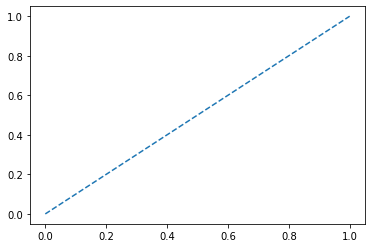

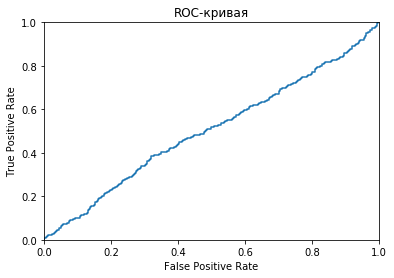

In [215]:
RanForest_model = RandomForestClassifier(random_state=12345, n_estimators=15, max_depth=10).fit(features_upsampled, target_upsampled)
predicted_test = RanForest_model.predict(features_test)
f1 = f1_score(target_test, predicted_test)


print("F1-Мера модели на валидационной выборке:", f1)

probabilities_test = model.predict_proba(features_test)
probabilities_one_valid = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, predicted_test)

print('Значение AUC-ROC = ',auc_roc)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

<div class="alert alert-block alert-info">
<b>Совет (ревью 2): </b> ROC-AUC нужно измерять между настоящими значением и вероятностями класса 1, а не предсказаниями.
</div>

**Вывод по шагу 5:** Провели тестирование модели с наилучшими показателями (Случайный лес, f_1=0.59) на заранее отобранной тестовой выборке. Результат показал, что f1 мера приблизительно равна f1мере валидационной выборки, так что модель скорее всего не переобучается. Однако ROC-кривая по значениям очень близка к случайной модели и значение auc-roc (0.76) далеко от желаемой 1, что говорит о том, что модель далека от идеала


# Общий вывод

Выводы по пройденым этапам в проекте:
1. Открыли, проанализировалли данные, проверив на дубликаты и дисбананс классов в целевом признаке.
2. Сбалансировали классы в целевом признаке, создав новый "сбалансированный" датасет, по которому разбили данные на 3 выборки
3. Исследовали 3 модели "Дерево решений", "Случайный лес" и "Логистическая Регрессия". Лучший результат f1 меры (0.59) показала модель "Случайный лес".
4. Проверили модели на заранее отделенной части датасета - тестовой выборке. "Случайный лес" по-прежнему показала лучшие результаты  f1 меры 0.60 Модель обучена в меру. 
5. Значение f1 меры значительно ниже значения auc_roc.

По заданию, необходимо было построить модель с предельно большим значением F1-меры. Полученная метрика Random Forest 0.61, при метрике auc-roc равной 0.76 
Цель достигнута